# Commodity Analysis 

This file is the first approach to a dataset of 6 commodities. Data are retrieved from yahoo finance and locally store into a SQL database before retrieving.

YF does not give many info about the data set in terms of rollover periods, contract size/type and so on...

This exercise must be taken with care as we can't ensure the quality of the data. It must be taken more as an exercise to improve perosnal skills with:

- Data Retrieving/Fetching using APIs
- Data storage and retrieving with Py+SQL
- Data analysis and Viz with pandas, matplotlib, Seaborn, Plotly
- Data interpretation by commenting the results and the charts

## Importing Data, Libraries and Scripts

Data is stored into commodity_lab/db/commodities.db 

In [8]:
import sys
print(sys.executable)

c:\Users\dgalassi\commodity_lab\env_commodity_lab\Scripts\python.exe


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly as ply
import plotly.express as px
import seaborn as sns
import sys

In [153]:
#do not print warnings for cleaness of the notebook
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#update the database with the most recent data
sys.path.append('../../scripts')

# --- this is a local script that uses two sub scripts you can find it in:
# commodity_lab/scripts
from update_commodities_data import update_commodities

#tickers i want to update
tickers = {
    "Gold": "GC=F",
    "Silver": "SI=F",
    "Crude Oil": "CL=F",
    "Natural Gas": "NG=F",
    "Copper": "HG=F",
    "Corn": "ZC=F",
    "Wheat": "ZW=F"
}
update_commodities(tickers)

[*********************100%***********************]  1 of 1 completed

Fetching  data for Gold (GC=F) - Period: 1y, Interval: 1d
Fetching  data for Silver (SI=F) - Period: 1y, Interval: 1d



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching  data for Crude Oil (CL=F) - Period: 1y, Interval: 1d
Fetching  data for Natural Gas (NG=F) - Period: 1y, Interval: 1d


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching  data for Copper (HG=F) - Period: 1y, Interval: 1d
Fetching  data for Corn (ZC=F) - Period: 1y, Interval: 1d


[*********************100%***********************]  1 of 1 completed

Fetched 1517 rows of data
Uploaded 1517 rows to prices table in database at ../../db/commodities.db
Data uploaded successfully


In [155]:
#connect to commodities db 
import sqlite3 as sql

#enstablish a connection
conn = sql.connect("../../db/commodities.db")
df = pd.read_sql('SELECT * FROM prices',conn)
conn.close()

## Analyze the Dataset

### Price Trends and Returns

We look at price trends, returns and returns distributions over different timeframes (daily, weekly and monthly)

In [285]:
df['date'] = pd.to_datetime(df['date'])
#exclude wheat
df = df[df.name != 'Wheat']
df_prices = df[['date','name','close']]
df_prices['date'] = pd.to_datetime(df.date)

In [186]:
#pivot to wide so we have each commodity in a column
df_wide = df.pivot(index='date', columns='name', values='close')
#calculate returns, reconvert to wide and drop NaN
df_daily = df_wide.pct_change(1).reset_index().melt(id_vars='date', var_name='name', value_name='return').dropna()
df_weekly = df_wide.pct_change(5).reset_index().melt(id_vars='date', var_name='name', value_name='return').dropna()
df_monthly = df_wide.pct_change(21).reset_index().melt(id_vars='date', var_name='name', value_name='return').dropna()

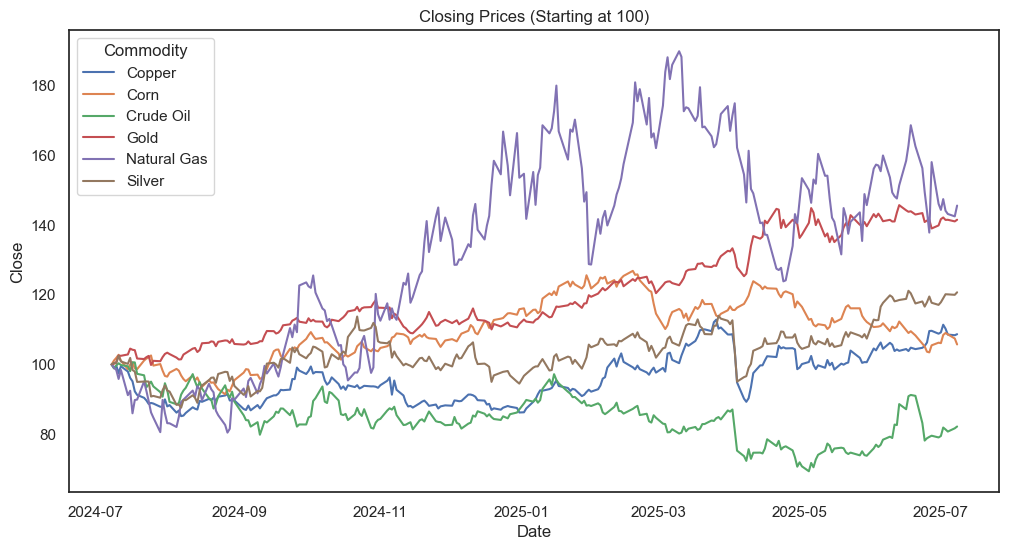

In [290]:
df_prices = df_prices.sort_values(['name','date'])
first_close = df_prices.groupby('name')['close'].transform('first')
df_prices['norm_close'] = df_prices['close'] / first_close*100

sns.set(style="white") 
# line plot: Closing Prices
plt.figure(figsize=(12,6))
sns.lineplot(data=df_prices, x='date', y='norm_close', hue='name')
plt.title('Closing Prices (Starting at 100)')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend(title='Commodity')
plt.show()

Prices have been normalized by divinding by the first price in the dataset

We can observe that:
- Gold and NG gave positive/bullish price actions between the Q3 of 2024 and Q2 of 2025
- Corn, Silver and Copper show more steady price movement
- Crude oil mostly negative (only spiked in 06/2025 due to Iran-Israel conflict)

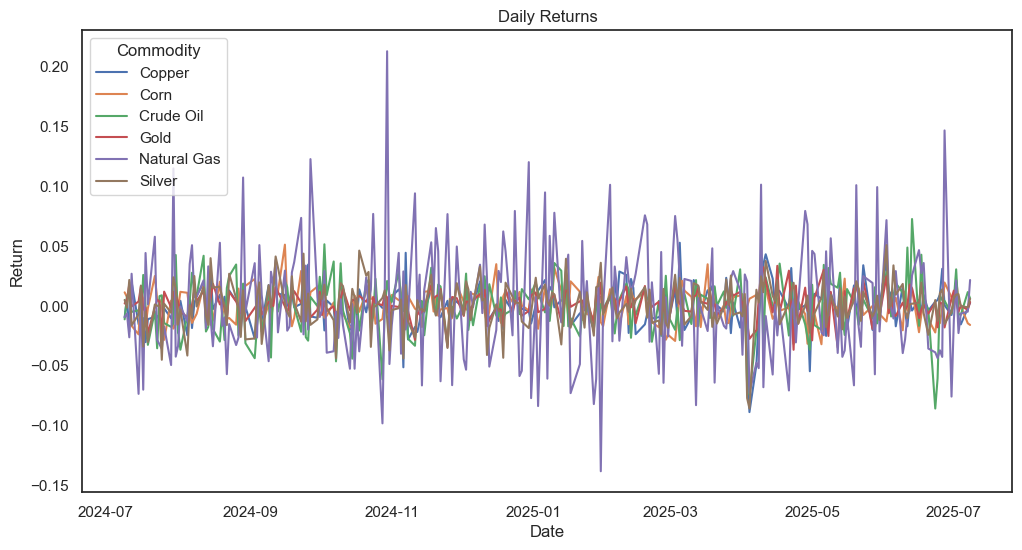

In [291]:
# line plot: Daily Returns
plt.figure(figsize=(12,6))
sns.lineplot(data=df_daily, x='date', y='return', hue='name')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(title='Commodity')
plt.show()

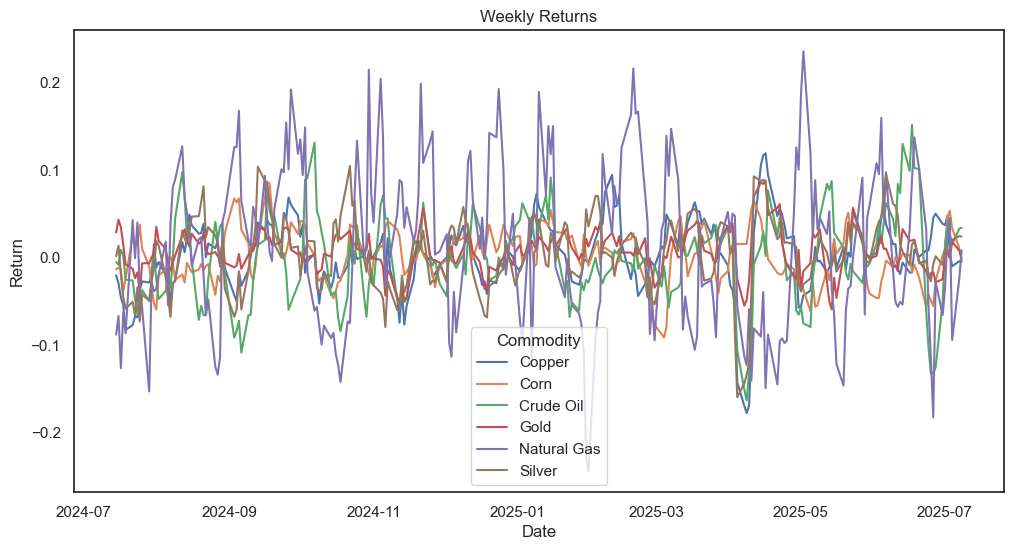

In [292]:
# line plot: Weekly Returns
plt.figure(figsize=(12,6))
sns.lineplot(data=df_weekly, x='date', y='return', hue='name')
plt.title('Weekly Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(title='Commodity')
plt.show()

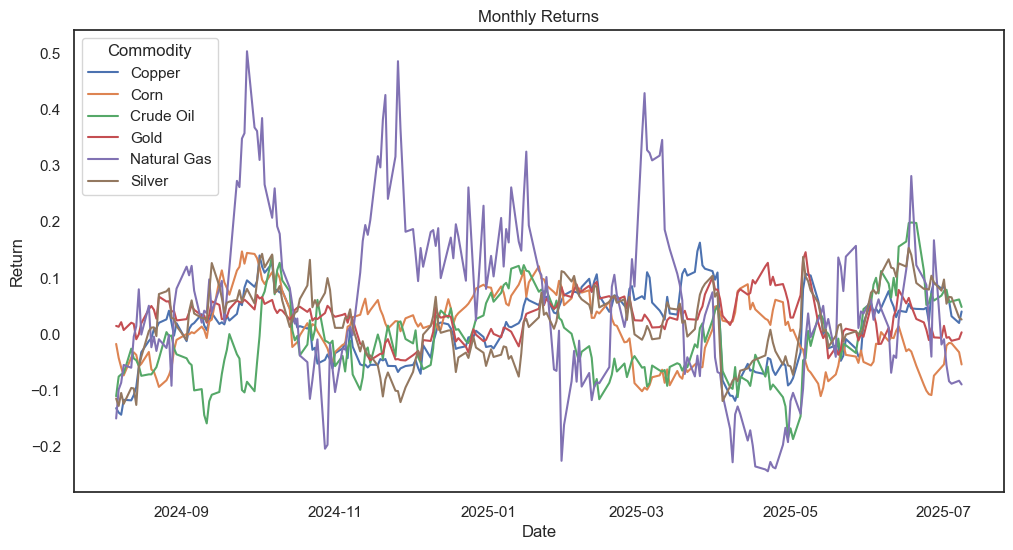

In [293]:
# line plot: Monthly Returns
plt.figure(figsize=(12,6))
sns.lineplot(data=df_monthly, x='date', y='return', hue='name')
plt.title('Monthly Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(title='Commodity')
plt.show()

**Obs:** NG and Oil show significantly greater oscillations which can be better observed in the following box plots

Remove the comment to visualie dynamically with plotly 

In [188]:
'''
# line plots

fig_close_prices = px.line(df_prices, x='date', y='close', color='name',title='Closing Prices')
fig_close_prices.show()

fig_daily_return = px.line(df_daily, x='date', y='return', color='name',title='Daily Returns')
fig_daily_return.show()

fig_weekly_return = px.line(df_weekly, x='date', y='return', color='name',title='Weekly Returns')
fig_weekly_return.show()

fig_monthly_return = px.line(df_monthly, x='date', y='return', color='name',title='Monthly Returns')
fig_monthly_return.show()

'''

"\n# line plots\n\nfig_close_prices = px.line(df_prices, x='date', y='close', color='name',title='Closing Prices')\nfig_close_prices.show()\n\nfig_daily_return = px.line(df_daily, x='date', y='return', color='name',title='Daily Returns')\nfig_daily_return.show()\n\nfig_weekly_return = px.line(df_weekly, x='date', y='return', color='name',title='Weekly Returns')\nfig_weekly_return.show()\n\nfig_monthly_return = px.line(df_monthly, x='date', y='return', color='name',title='Monthly Returns')\nfig_monthly_return.show()\n\n"

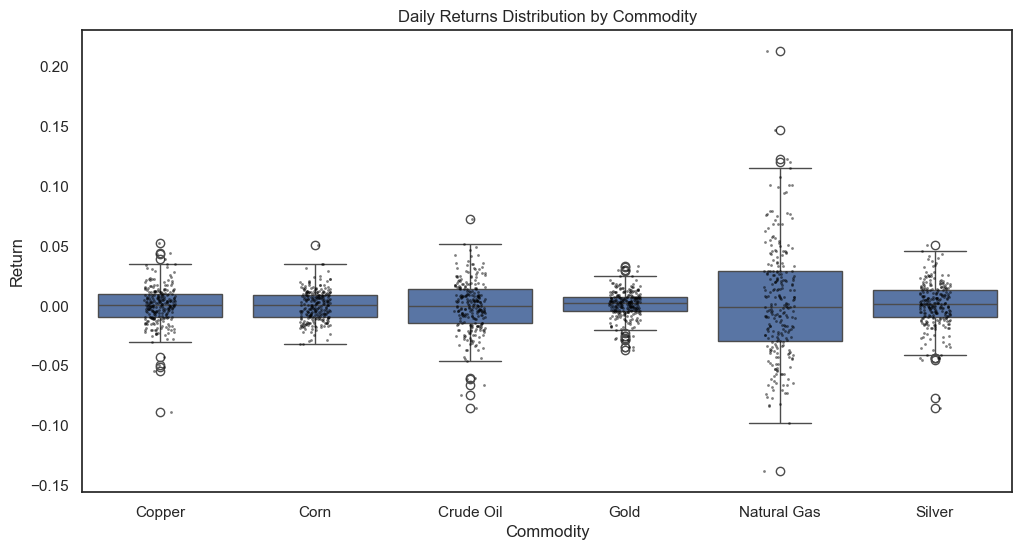

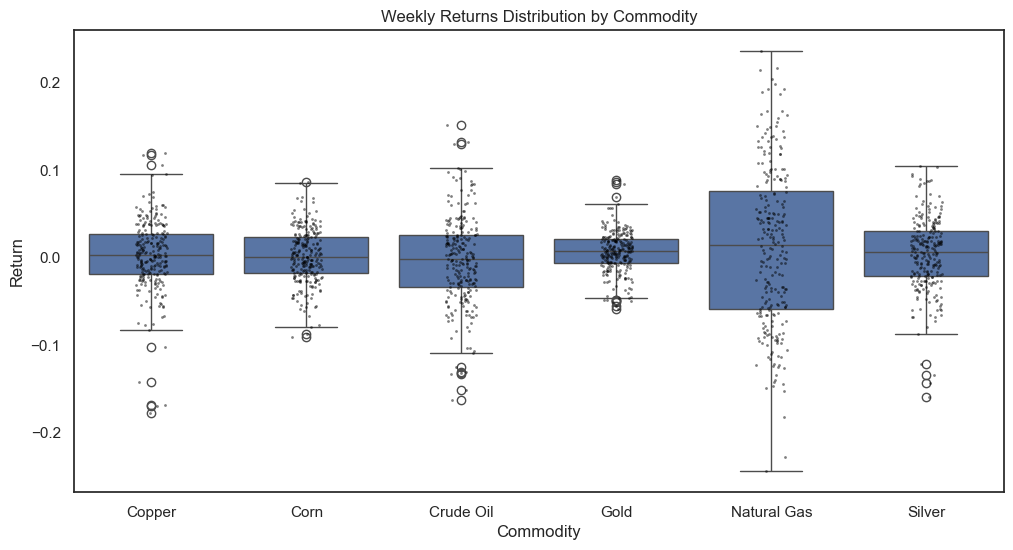

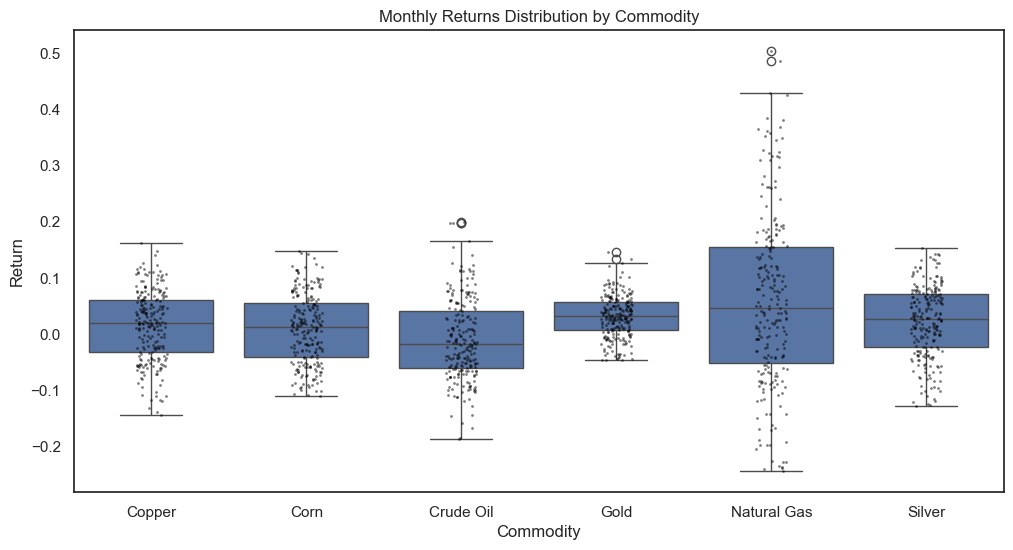

In [189]:
sns.set(style="white")  # clean white background

# Daily Returns Distribution by Commodity
plt.figure(figsize=(12,6))
sns.boxplot(data=df_daily, x='name', y='return')
sns.stripplot(data=df_daily, x='name', y='return', color='black', size=2, jitter=True, alpha=0.5)
plt.title('Daily Returns Distribution by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Return')
plt.grid(False)
plt.show()

# Weekly Returns Distribution by Commodity
plt.figure(figsize=(12,6))
sns.boxplot(data=df_weekly, x='name', y='return')
sns.stripplot(data=df_weekly, x='name', y='return', color='black', size=2, jitter=True, alpha=0.5)
plt.title('Weekly Returns Distribution by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Return')
plt.grid(False)
plt.show()

# Monthly Returns Distribution by Commodity
plt.figure(figsize=(12,6))
sns.boxplot(data=df_monthly, x='name', y='return')
sns.stripplot(data=df_monthly, x='name', y='return', color='black', size=2, jitter=True, alpha=0.5)
plt.title('Monthly Returns Distribution by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Return')
plt.grid(False)
plt.show()


**Obs:** even with different timeframes the compraed distributions of returns between commodities is quite clear:
- NG and Oil are strongly volatile (e.g. NG shows returns up to 50% and down to -25% on a monthly horizon)
- Gold has been particulary positive in the last year, thus the distribution is right skewed but also shows short tails and a fat body (safety heaven asset)

Remove the comment to visualie dynamically with plotly 

In [190]:
'''
#box plots

fig_daily_box_return = px.box(df_daily,x='name',y='return',points='all',
                              title='Daily Returns Distribution by Commodity')
fig_daily_box_return.show()


fig_weekly_box_return = px.box(df_weekly,x='name',y='return',points='all',
                              title='Weekly Returns Distribution by Commodity')
fig_weekly_box_return.show()


fig_monthly_box_return = px.box(df_monthly,x='name',y='return',points='all',
                              title='Monthly Returns Distribution by Commodity')
fig_monthly_box_return.show()
'''

"\n#box plots\n\nfig_daily_box_return = px.box(df_daily,x='name',y='return',points='all',\n                              title='Daily Returns Distribution by Commodity')\nfig_daily_box_return.show()\n\n\nfig_weekly_box_return = px.box(df_weekly,x='name',y='return',points='all',\n                              title='Weekly Returns Distribution by Commodity')\nfig_weekly_box_return.show()\n\n\nfig_monthly_box_return = px.box(df_monthly,x='name',y='return',points='all',\n                              title='Monthly Returns Distribution by Commodity')\nfig_monthly_box_return.show()\n"

### Volatility & Drawdowns

In [191]:
#annualized rolling volatility 
df_daily_wide = df_daily.pivot(index='date',columns='name',values='return')
df_rolling_vol = df_daily_wide.rolling(window=21).std()*np.sqrt(252)
df_rolling_vol = df_rolling_vol.reset_index().melt(id_vars='date', var_name='name', value_name='volatility')
df_rolling_vol= df_rolling_vol.dropna()

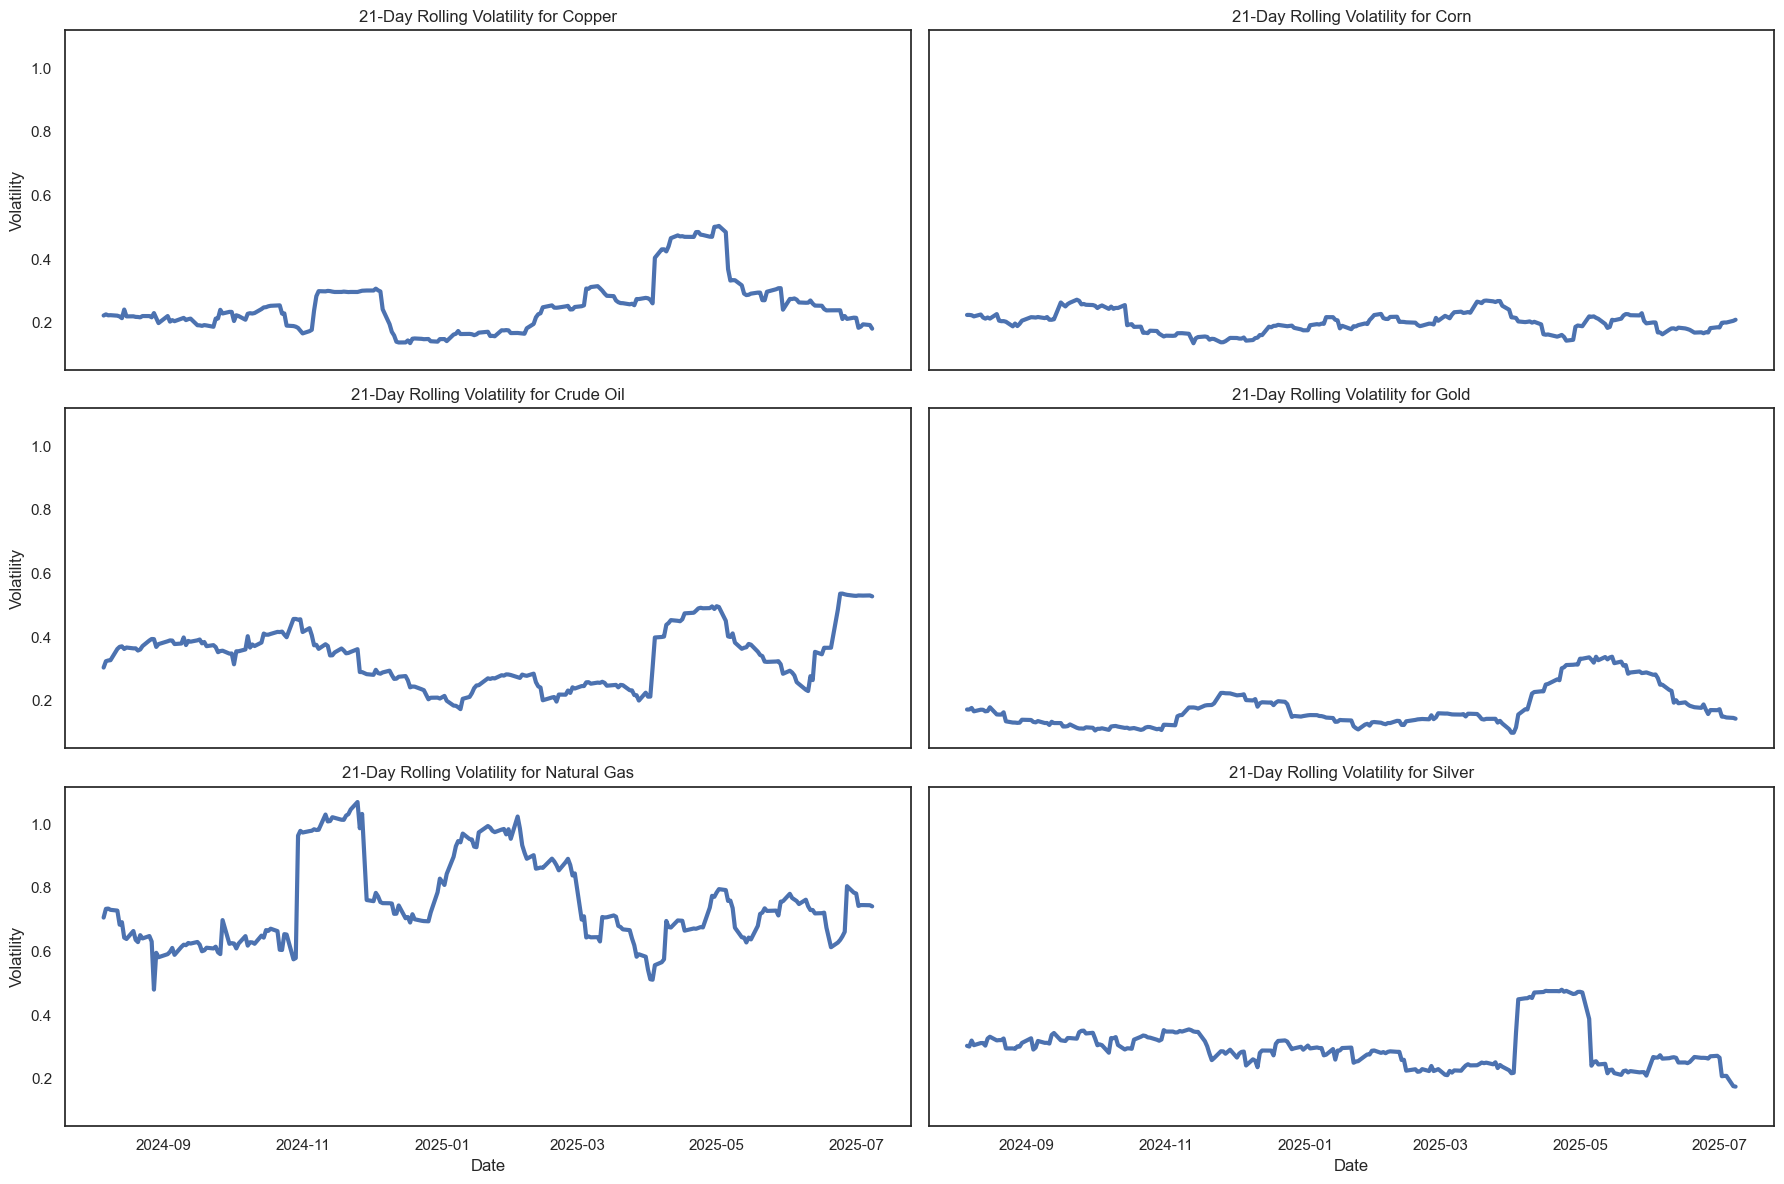

In [213]:
commodities = df_rolling_vol.name.unique()
num_plots = len(commodities)

fig, axes = plt.subplots(3, 2, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()  # flatten to easily index with a single number

for i, commodity in enumerate(commodities):
    ax = axes[i]
    y = df_rolling_vol[df_rolling_vol.name == commodity]
    
    sns.lineplot(data=y, x='date', y='volatility', ax=ax, linewidth = 3)
    ax.set_title(f'21-Day Rolling Volatility for {commodity}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volatility')


plt.tight_layout()
plt.show()


**Obs:** this chart highlights the differences in volatility precedently described even when averaging (rolling) over 1 month (21 trading days)

In [193]:
#max drawdown
df_dd = df_prices.pivot(index='date', values='close', columns='name')
running_max = df_dd.cummax()
df_dd = (df_dd - running_max)/running_max
df_dd = df_dd.reset_index().melt(value_name='drawdown', var_name='name', id_vars='date')

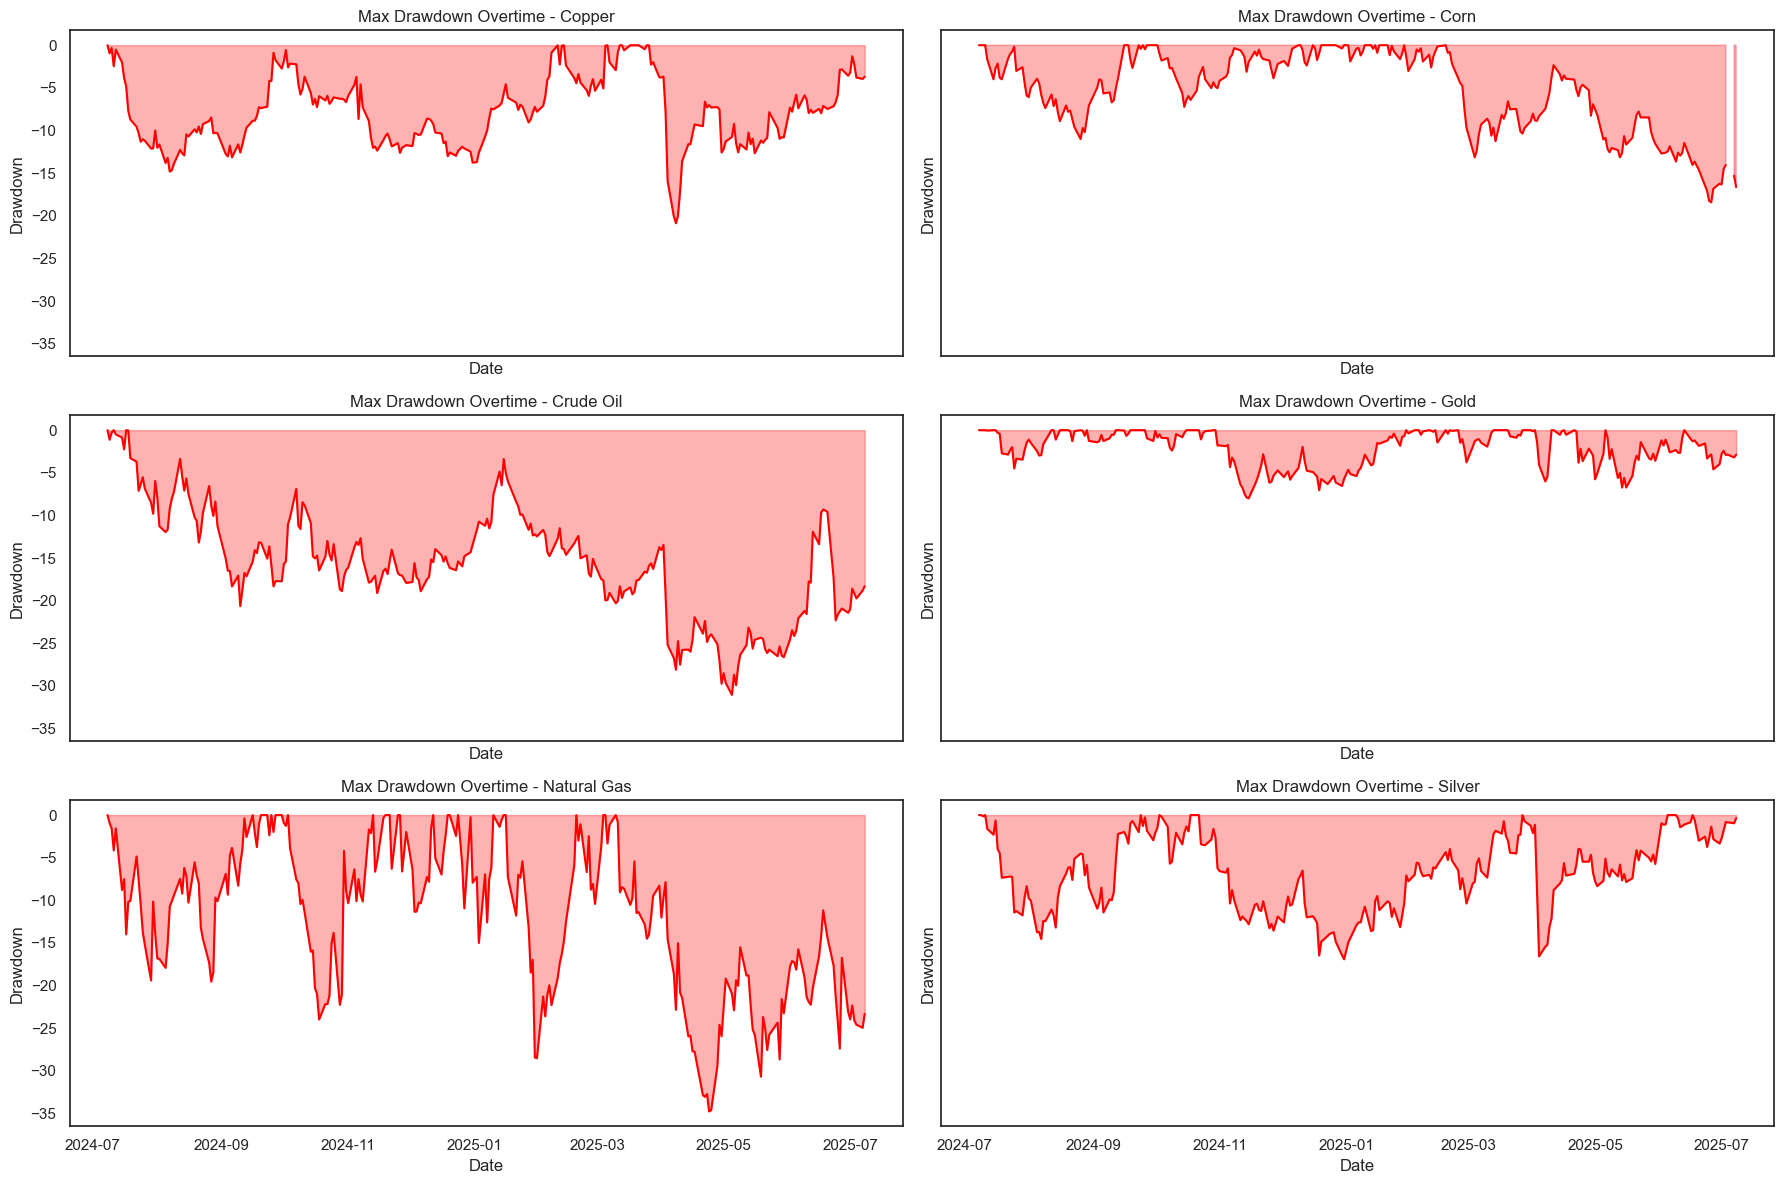

In [214]:
commodities = df_dd.name.unique()

fig, axes = plt.subplots(3, 2, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()  # flatten to easily index with a single number

for i, commodity in enumerate(commodities):
    ax = axes[i]
    y = df_dd[df_dd.name == commodity]
    
    ax.plot(y.date, y.drawdown*100, color = 'red')
    ax.fill_between(y.date,0,y.drawdown*100, color = 'red',alpha = 0.3)
    ax.set_title(f'Max Drawdown Overtime - {commodity}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Drawdown')


plt.tight_layout()
plt.show()


**Obs:** the evolution of the drawdown is reported here.
- NG and oil (being higly volatile) present big drawdowns (down to -35%)
- Gold seems to be a great asset to hold, drawdowns are minimized but this is because in this year it reached several time new ATHs (you can see whenever the line touches back the 0)
- Corn performed well in q4 2024 adn Q1 2025 and then started declining
- Copper and Silver are more stable with, we can highlight that in the last months liquidity is shifting from gold to those commodities

In [294]:
#VaR - on any given perios there is only a 5% risk of losing more than X% 
#CVar - the average loss of those 5% worst cases

#daily
df_daily_var95 = df_daily.pivot(index='date', values='return', columns='name')
var95 = df_daily_var95.quantile(0.05)
c_var95 = df_daily_var95[df_daily_var95 <= var95].mean()
varCvar_dict = {'daily_var95':var95,'daily_cvar95':c_var95}
df_daily_varCvar = pd.DataFrame(varCvar_dict)

#weekly
df_weekly_var95 = df_weekly.pivot(index='date', values='return', columns='name')
var95 = df_weekly_var95.quantile(0.05)
c_var95 = df_weekly_var95[df_weekly_var95 <= var95].mean()
varCvar_dict = {'weekly_var95':var95,'weekly_cvar95':c_var95}
df_weekly_varCvar = pd.DataFrame(varCvar_dict)

#monthly
df_monthly_var95 = df_monthly.pivot(index='date', values='return', columns='name')
var95 = df_monthly_var95.quantile(0.05)
c_var95 = df_monthly_var95[df_monthly_var95 <= var95].mean()
varCvar_dict = {'monthly_var95':var95,'monthly_cvar95':c_var95}
df_monthly_varCvar = pd.DataFrame(varCvar_dict)

df_varCvar = pd.concat([df_daily_varCvar,df_weekly_varCvar,df_monthly_varCvar],axis=1)

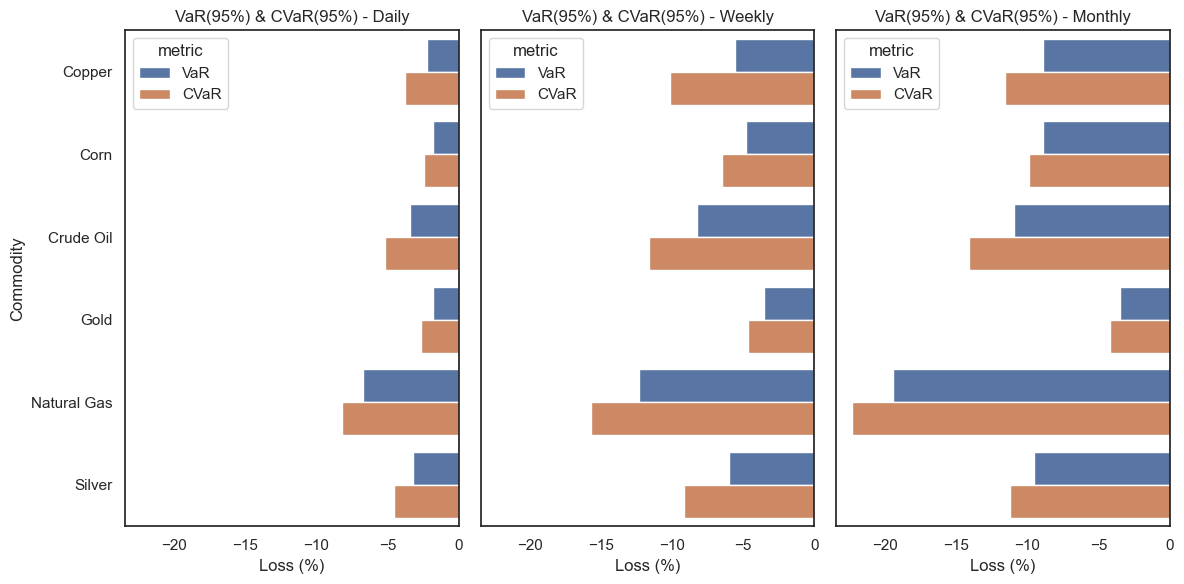

In [211]:
# reshape the df into y to plot

#reset index so name i a column
y = df_varCvar.reset_index()
#melt into a long format
y = y.melt(id_vars='name',
    value_vars=['daily_var95', 'daily_cvar95', 'weekly_var95', 'weekly_cvar95', 'monthly_var95', 'monthly_cvar95'],
    var_name='metric_name', value_name='value')
#create the metric column
y['period'] = y['metric_name'].str.extract(r'(daily|weekly|monthly)')
#create the 
y['metric'] = y['metric_name'].str.extract(r'(var95|cvar95)').replace({'var95':'VaR', 'cvar95':'CVaR'})
y.value = y.value*100
#plotting
fig, axes = plt.subplots(1,3,figsize=(12,6),sharex=True,sharey=True)
axes = axes.flatten()
for i, horizon in enumerate(['daily', 'weekly', 'monthly']):  # fixed order
    ax = axes[i]
    data = y[y['period'] == horizon]
    sns.barplot(data = data, x='value', y = 'name', hue ='metric', ax=ax)
    ax.set_title(f'VaR(95%) & CVaR(95%) - {horizon.capitalize()}')
    ax.set_xlabel('Loss (%)')
    ax.set_ylabel('Commodity' if i==0 else '')
    ax.axvline(0, color='black', linestyle='--', lw=1)
    ax.grid(False)

plt.tight_layout()
plt.show()

**Obs:** Another confirmation of the comments added before

### Correlation Analysis

In [ ]:
'''#daily corr
corr_daily = df_daily.pivot(index='date',columns='name', values='return').corr()
corr_daily.index.name = None
corr_daily.columns.name = None
#weekly corr
corr_weekly = df_weekly.pivot(index='date',columns='name', values='return').corr()
corr_weekly.index.name = None
corr_weekly.columns.name = None
'''
#monthly corr
corr_monthly = df_monthly.pivot(index='date',columns='name', values='return').corr()
corr_monthly.index.name = None
corr_monthly.columns.name = None

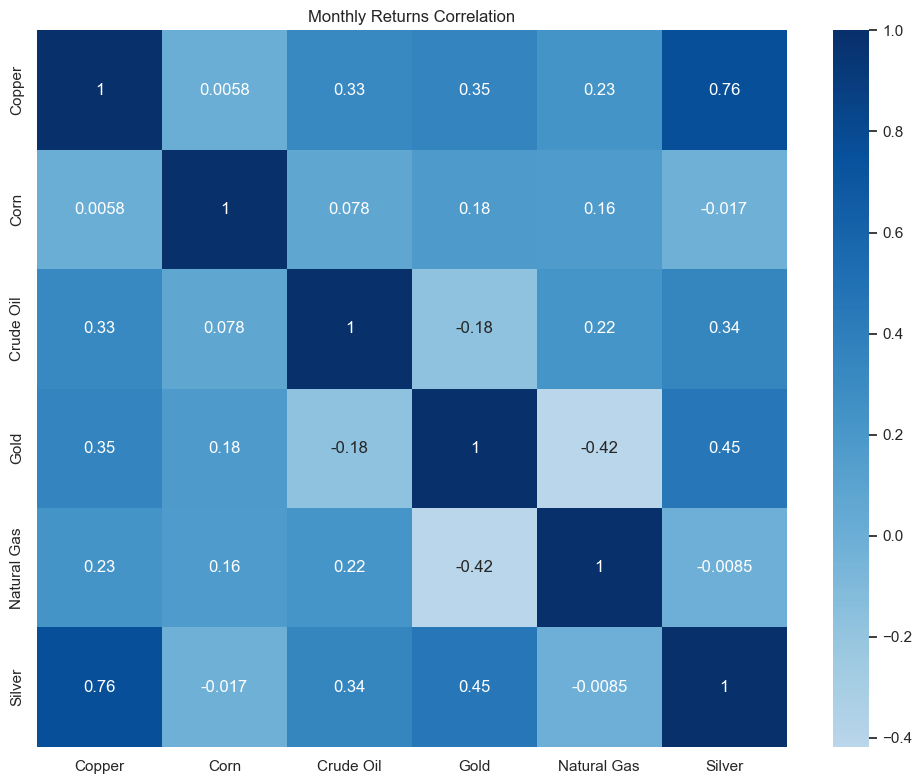

In [236]:
corr_2_show = corr_monthly

plt.figure(figsize=(10,8))
sns.heatmap(corr_2_show, annot=True, cmap='Blues', center=0)
plt.title("Monthly Returns Correlation")
plt.tight_layout()
plt.show()


**Obs:** what do we observe?
- Copper strongly correlated with silver, non correlated with Corn
- Corn looks to be uncorrelated from all teh other commodities
- Oil is weakly correlated with copper and silver, and negatively correlated with gold
- Gold correlated with silver and copper, negatively correlated with NG and Oil
- NG mostly non correlated
- Silver strongly correlated with copper and positively with gold

### Volume & Liquidity

First we need to convert the volume tells us how many contracts have been exchanged but we have no information because for different commodities we have different contract sizes and unit of measurements

In [250]:
contract_sizes = {
    "GC=F": 100,      # Gold (100 troy ounces)
    "SI=F": 5000,     # Silver (5000 troy ounces)
    "CL=F": 1000,     # Crude Oil (1000 barrels)
    "NG=F": 10000,    # Natural Gas (10,000 mmBtu)
    "HG=F": 25000,    # Copper (25,000 pounds)
    "ZC=F": 5000,     # Corn (5,000 bushels)
    "ZW=F": 5000      # Wheat (5,000 bushels)
}

dfv = df.copy()
#add the contract size column by mapping tickers
dfv['contract_size'] = dfv['ticker'].map(contract_sizes)
#calculate dollar volume
dfv['dollar_volume'] = dfv['volume'] * dfv['close'] * dfv['contract_size']

In [254]:
dfv.groupby('name').dollar_volume.mean()

name
Copper         1.456728e+08
Corn           3.469260e+11
Crude Oil      2.111412e+10
Gold           1.433218e+09
Natural Gas    5.326318e+09
Silver         2.330732e+08
Name: dollar_volume, dtype: float64

After this calculation we can highlight that those numbers can't be right (contract size scaler is most likely wrong - I used CME contracts specs). Unfortunately, Yahoo Finance does not giev any information about the volume in terms of contract size. 

Thus, having different contract sizes and unit of measurements we can't proceed with an INTERcomparison, but we need to stop at an INTRAcomparison sticking with the "volume"

In [ ]:
#liquidity snapshot

dfv = df.copy()
liquidity_stats = list()
for commodity in dfv.name.unique():
    data = dfv[dfv.name == commodity].copy()

    #ADV
    adv21 = round(data.volume.rolling(21).mean().iloc[-1],0)
    adv63 = round(data.volume.rolling(63).mean().iloc[-1],0)
    adv252 = round(data.volume.rolling(252).mean().iloc[-1],0)

    #Median Volume
    median_vol = round(data.volume.median(),0)

    #Average Volume
    mean_vol = round(data.volume.mean(),0)

    #percentiles

    p10 = round(np.percentile(data.volume,10),0)
    p25 = round(np.percentile(data.volume,25),0)
    p75 = round(np.percentile(data.volume,75),0)
    p90 = round(np.percentile(data.volume,90),0)
    
    liquidity_stats.append({
        'Commodity': commodity,
        'ADV 21': adv21,
        'ADV 63': adv63,
        'ADV 252': adv252,
        'Median': median_vol,
        'Mean' : mean_vol,
        'P10': p10,
        'P25': p25,
        'P75': p75,
        'P90': p90
    })

liq_df = pd.DataFrame(liquidity_stats)
liq_df

,Commodity,ADV 21,ADV 63,ADV 252,Median,Mean,P10,P25,P75,P90
0,Gold,3388.0,5136.0,4969.0,470.0,4952.0,28.0,96.0,1477.0,3442.0
1,Crude Oil,222399.0,267388.0,301527.0,297928.0,301432.0,124269.0,240060.0,362038.0,440129.0
2,Silver,4863.0,2499.0,1430.0,74.0,1425.0,4.0,21.0,217.0,649.0
3,Natural Gas,128342.0,149577.0,166607.0,166422.0,166590.0,79764.0,139410.0,199977.0,227913.0
4,Copper,2556.0,1718.0,1305.0,586.0,1302.0,311.0,430.0,872.0,1388.0
5,Corn,132364.0,135257.0,157352.0,171114.0,157352.0,711.0,116100.0,218118.0,264360.0


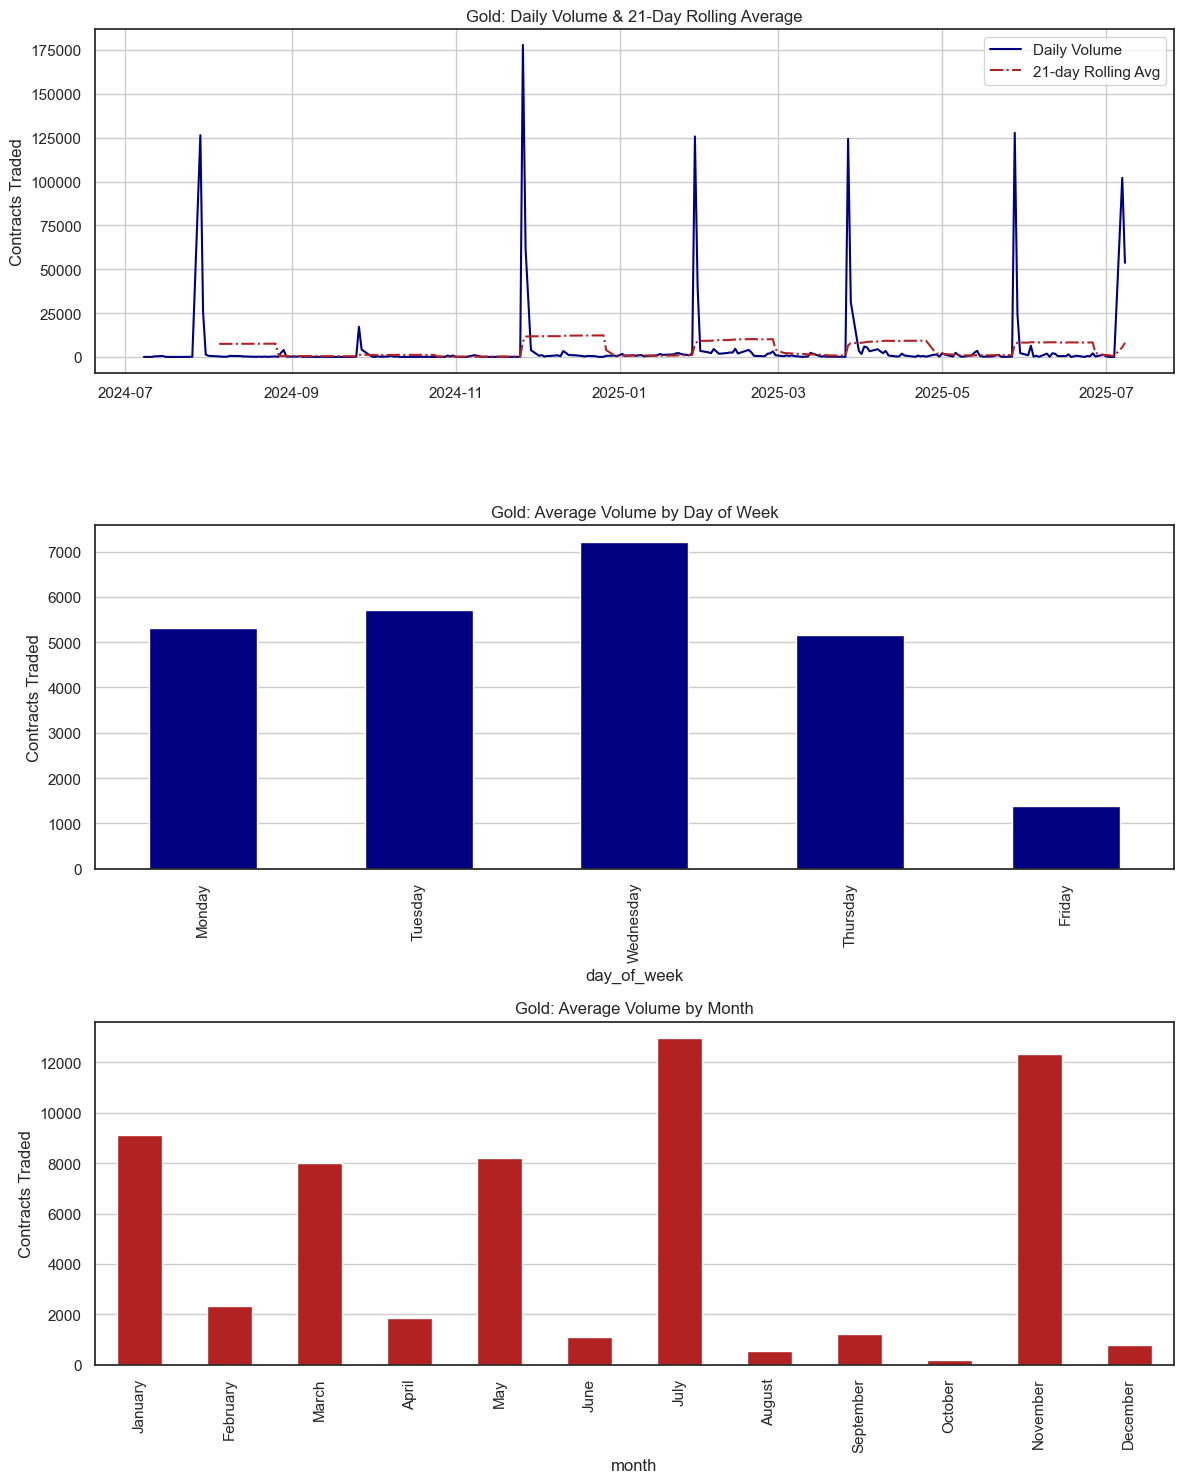

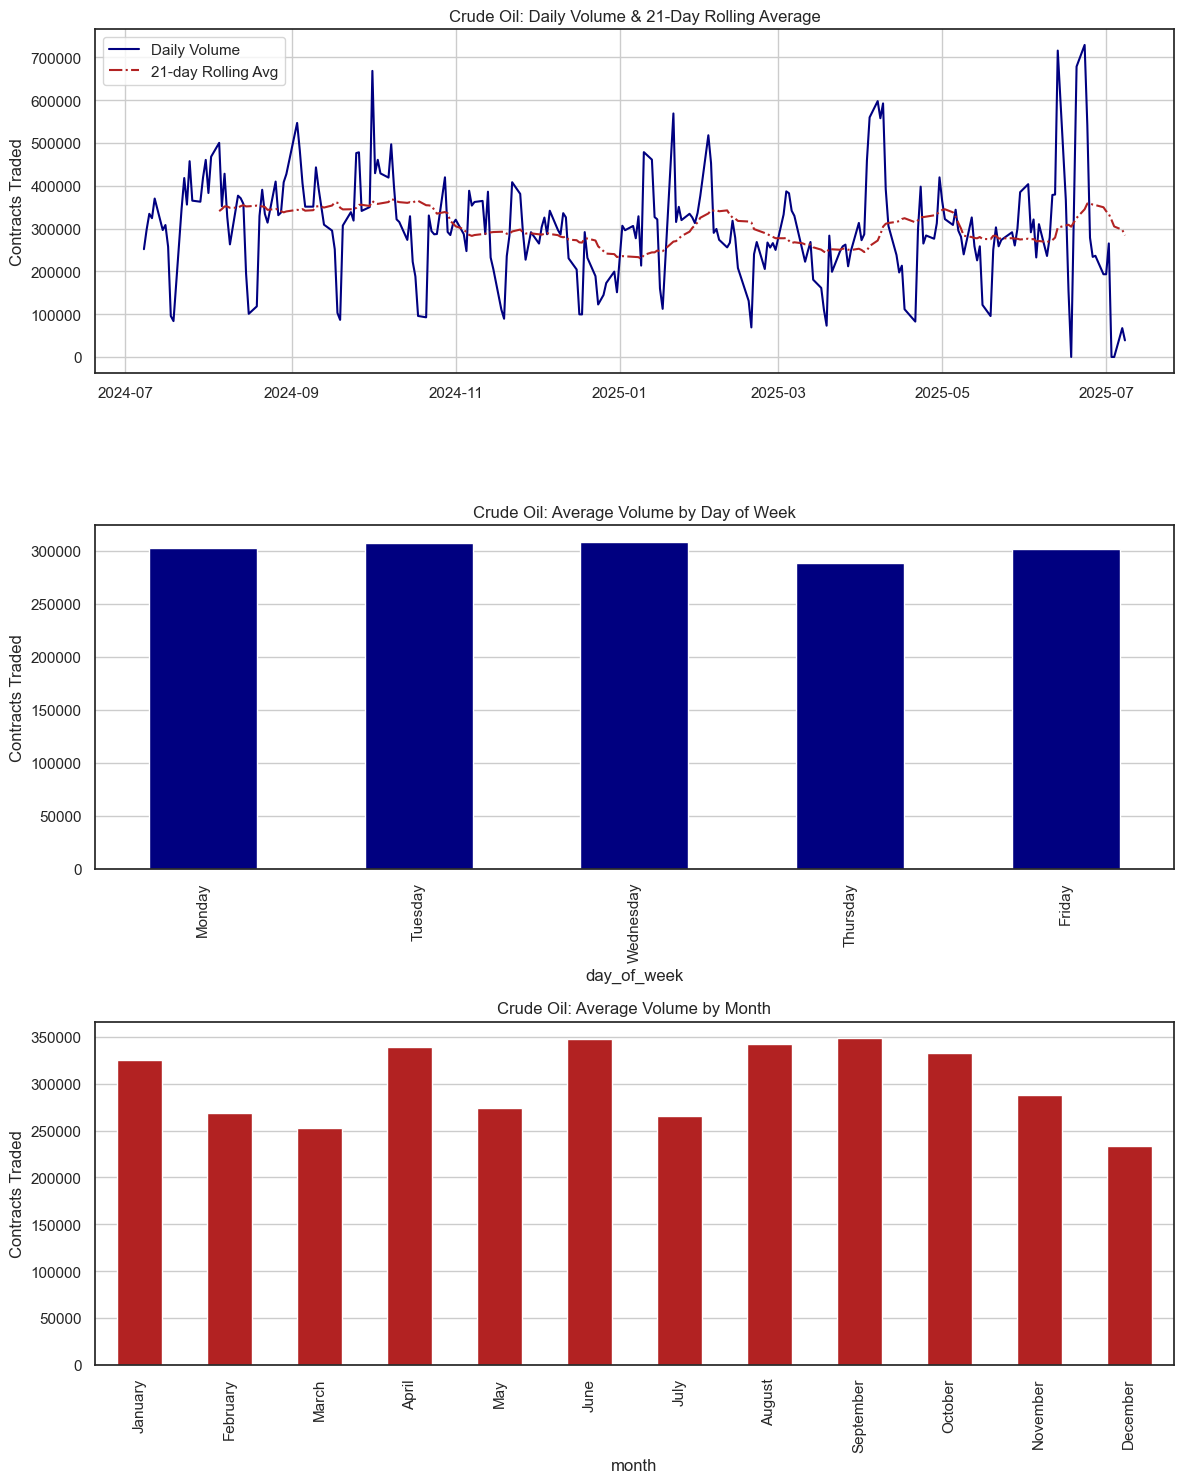

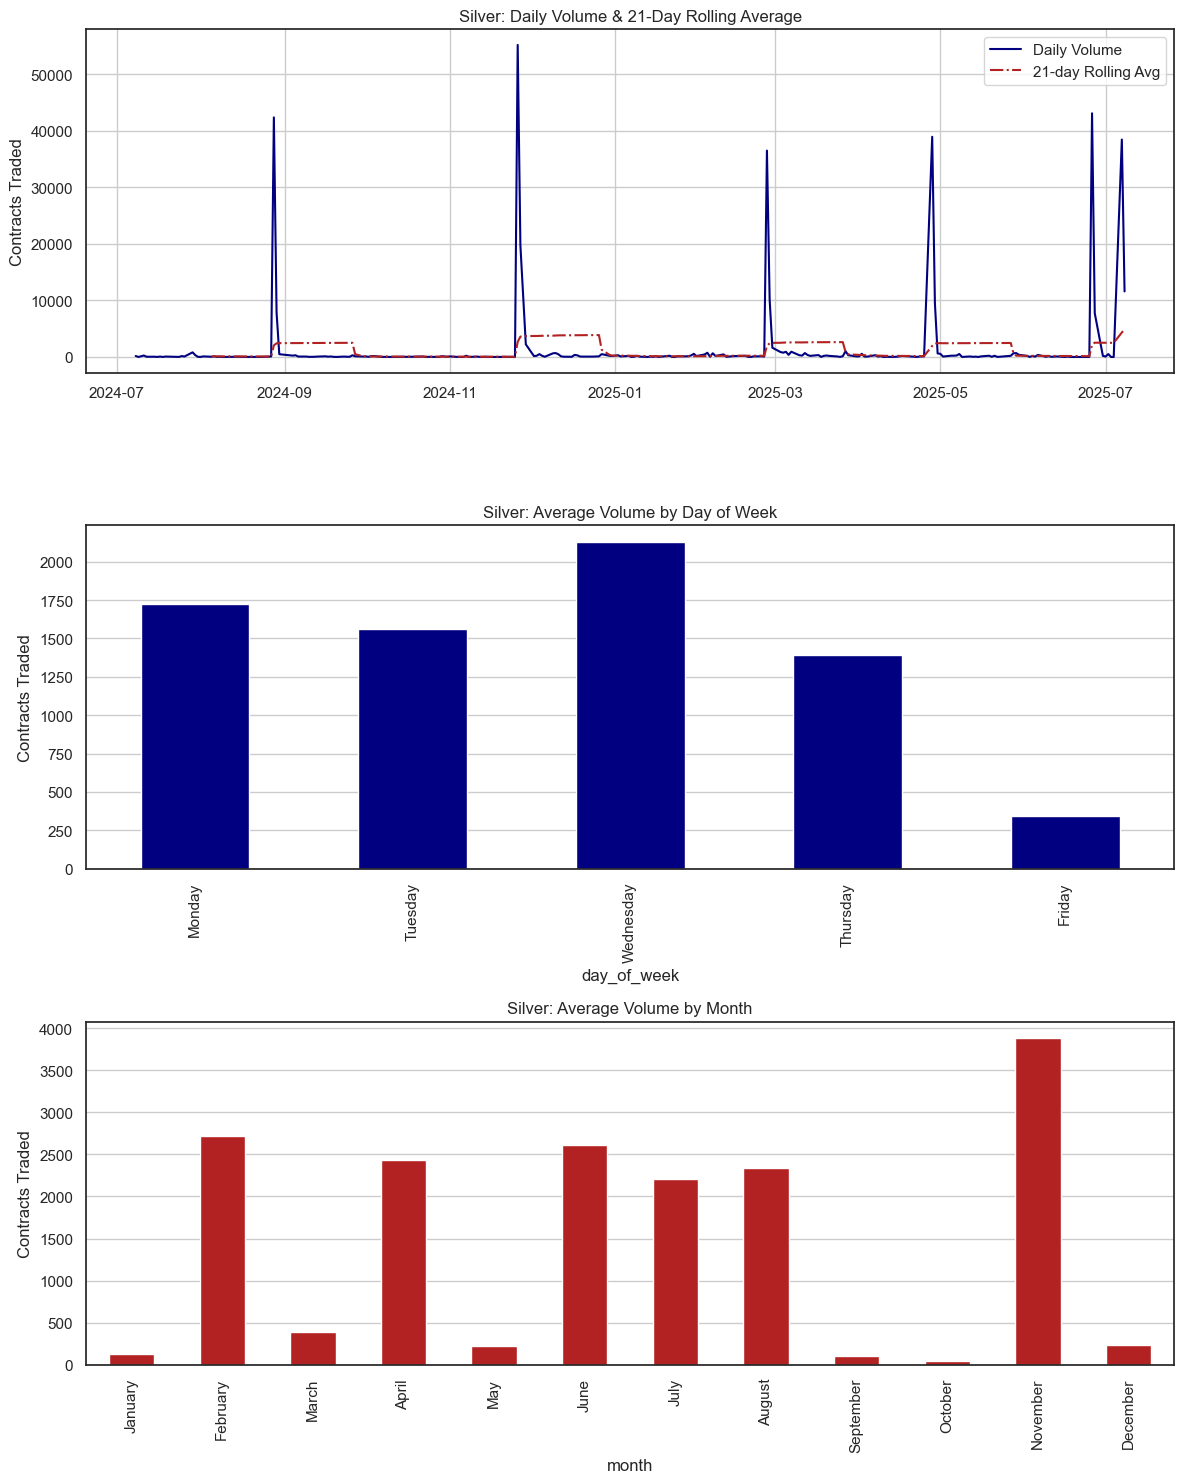

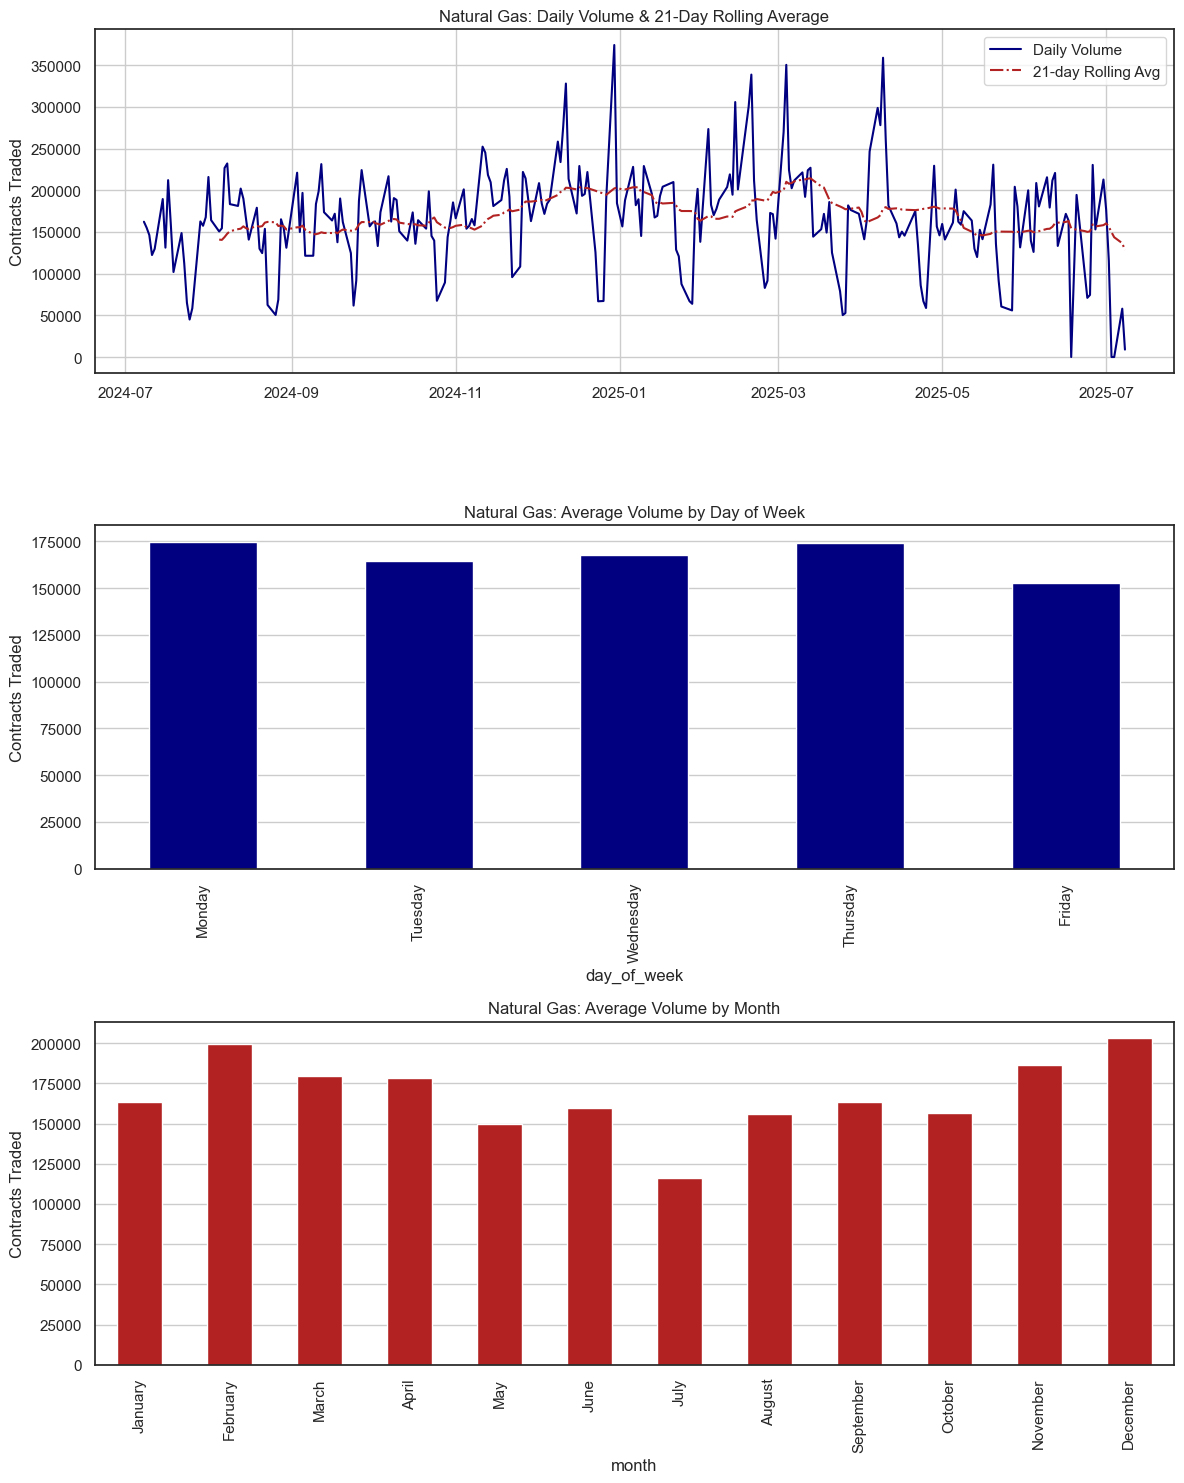

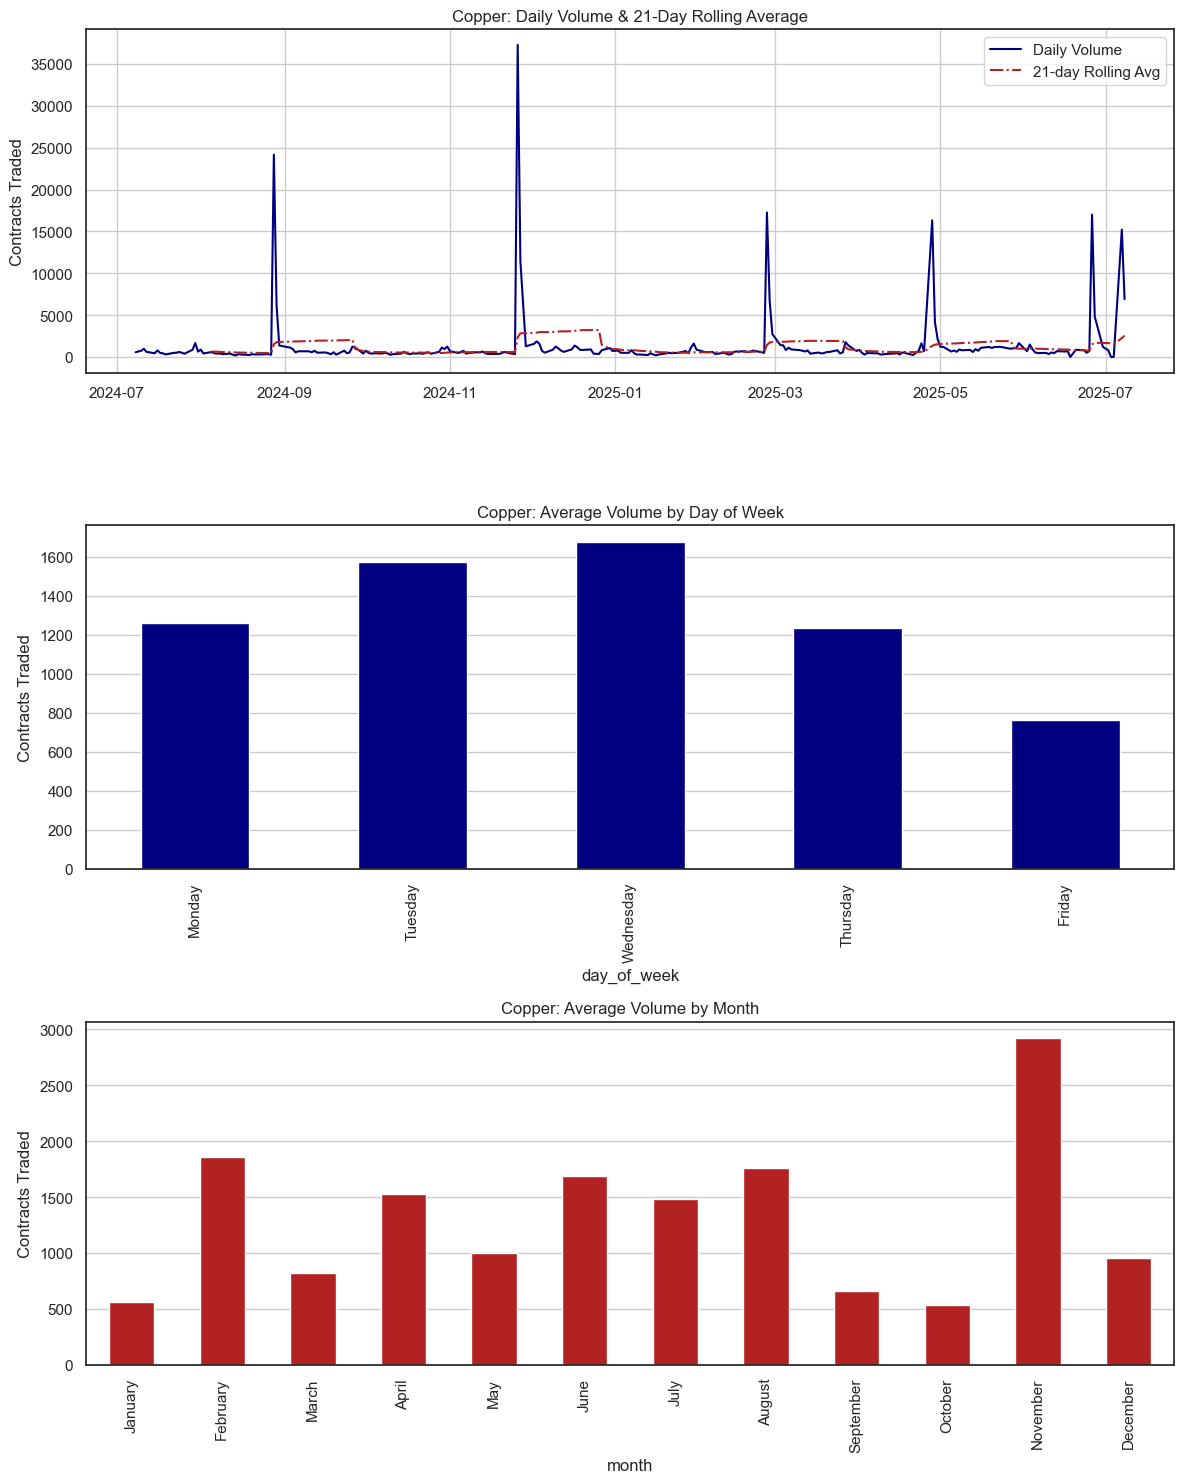

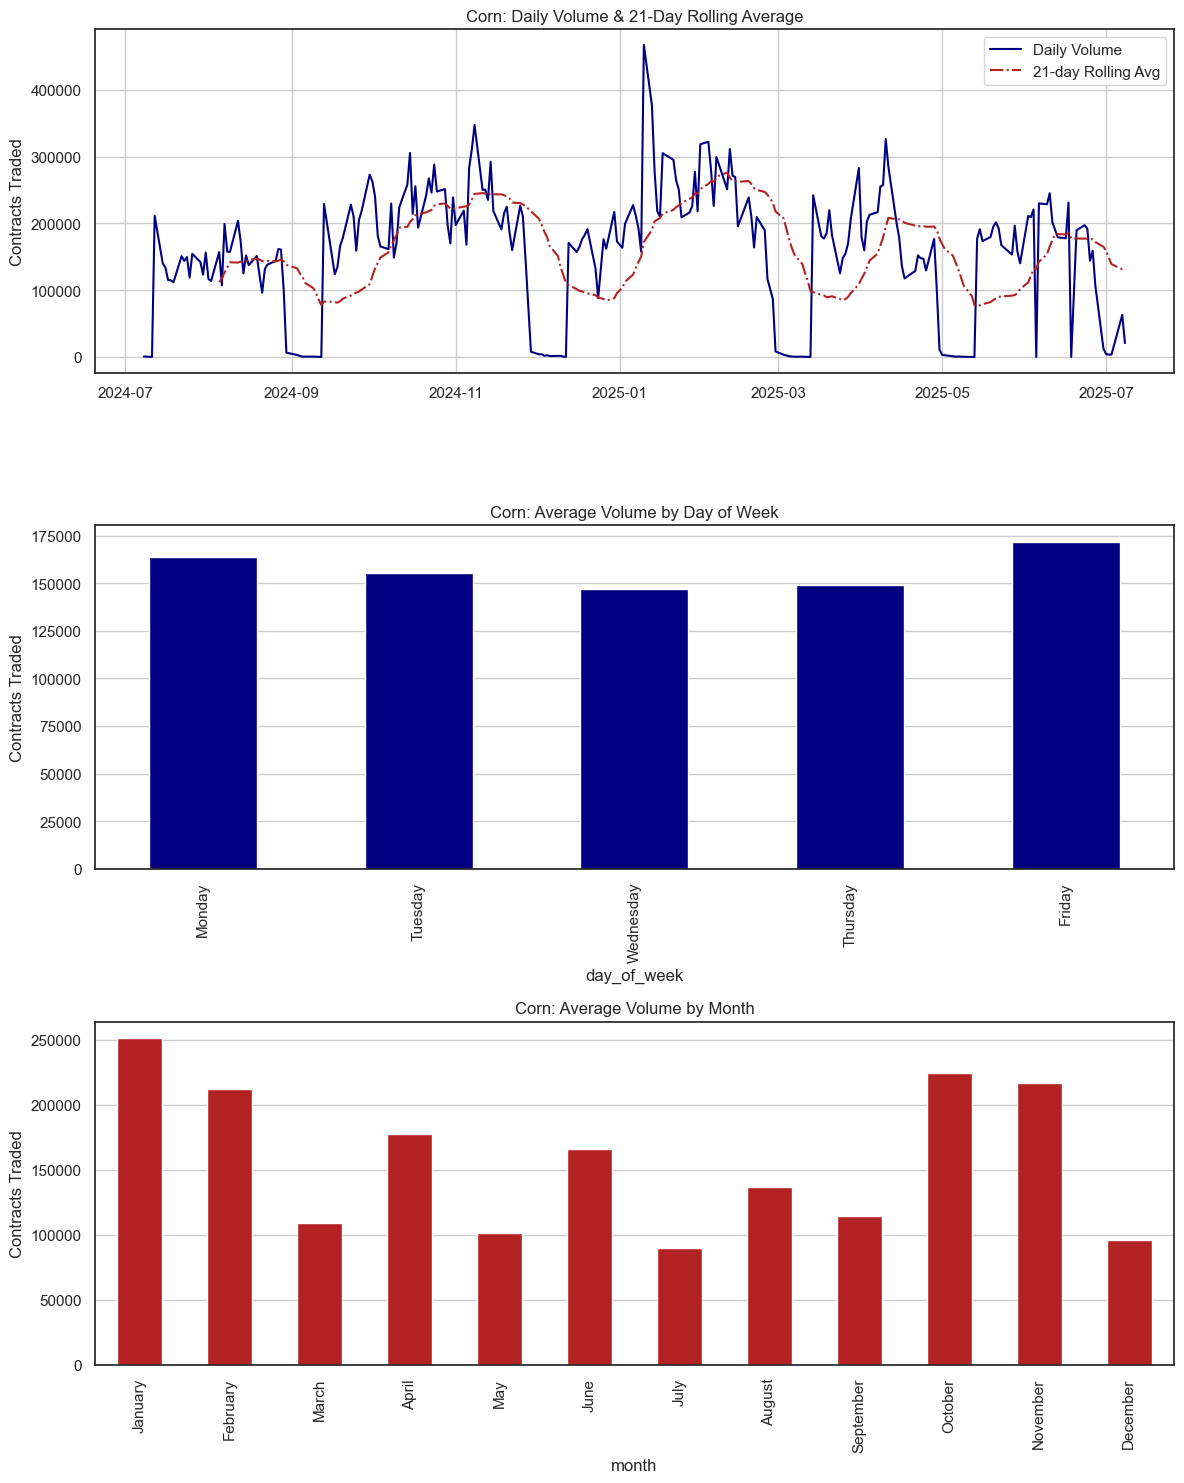

In [ ]:
df['date'] = pd.to_datetime(df['date'])

for commodity in df['name'].unique():
    data = df[df['name'] == commodity].copy()
    data = data.sort_values('date')
    #rolling volume
    data['volume_ma21'] = data['volume'].rolling(21).mean()
    #add day of the week and mothn to data df
    data['day_of_week'] = data['date'].dt.day_name()
    data['month'] = data['date'].dt.month_name()
    
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    dow_avg = data.groupby('day_of_week')['volume'].mean().reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
    
    month_avg = data.groupby('month')['volume'].mean().reindex(month_order)
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))
    
    # 1) Rolling volume
    axes[0].plot(data['date'], data['volume'], label='Daily Volume', color = 'navy')
    axes[0].plot(data['date'], data['volume_ma21'], color='firebrick', label='21-day Rolling Avg', linestyle = '-.')
    axes[0].set_title(f'{commodity}: Daily Volume & 21-Day Rolling Average')
    axes[0].set_ylabel('Contracts Traded')
    axes[0].legend()
    axes[0].grid(True)
    
    # 2) Avg volume by day of week
    dow_avg.plot(kind='bar', color='navy', ax=axes[1])
    axes[1].set_title(f'{commodity}: Average Volume by Day of Week')
    axes[1].set_ylabel('Contracts Traded')
    axes[1].grid(axis='y')
    
    # 3) Avg volume by month
    month_avg.plot(kind='bar', color='firebrick', ax=axes[2])
    axes[2].set_title(f'{commodity}: Average Volume by Month')
    axes[2].set_ylabel('Contracts Traded')
    axes[2].grid(axis='y')
    
    plt.tight_layout()
    plt.show()


We can notice that ores such as gold, silver and copper present huge spikes... let's have a deeper check.. for example with gold!

In [283]:
gold = df[df.name == 'Gold']
median_gold_vol = gold.volume.median()
gold_spike = gold[gold.volume > 5*median_gold_vol]
gold_spike = gold_spike.sort_values('volume',ascending=False)
gold_spike[['date','volume']].head()

,date,volume
350,2024-11-26,177858.0
97,2025-05-28,127758.0
265,2024-07-29,126409.0
15,2025-01-29,125692.0
55,2025-03-27,124359.0


These dates correspond to roll over periods

- Rollover start 30/11/2024 --> peak of 26/11/2024
- Rollover start 27/07/2024 --> peak of 29/07/2024
....